In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.metrics import mean_squared_error

The first two rows are original images, and the next two are noisy


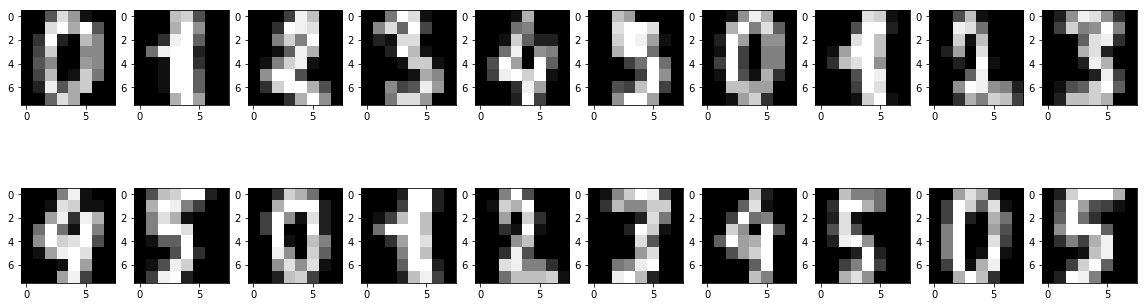

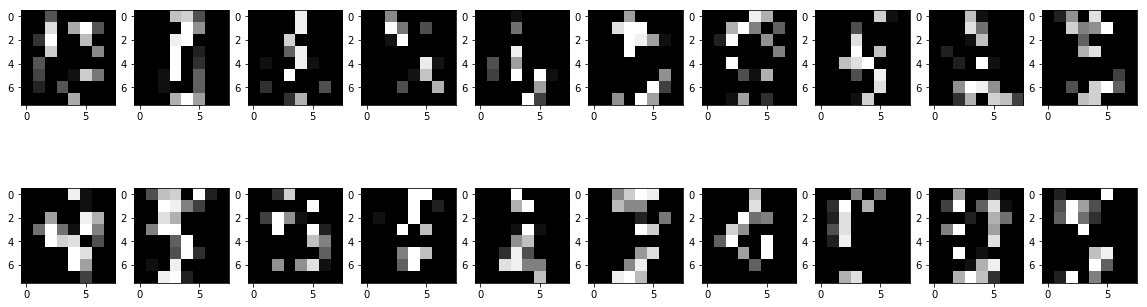

In [18]:
def show_some_digits(X):

    # Here we visualize some of the data points in the data set. 
    #
    # Create a large figure, to be filled with multiple subplots
    plt.figure(figsize=(20,6))
    # Go over the first 30 data points
    for index, (image) in enumerate(zip(X[0:20])):
        plt.subplot(2, 10, index + 1)
        # Reshape the 64 features of each data point into an 8x8 image and then plot it.
        plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    return


# Here we create a noisy version of the data set
# The way that we do it is we go over all the pixels of
# each of the data points; then with probability p we multiply
# the value of that pixel by 0 (makring it essentially black).
# Otherwise (with probability 1-p) we multiply the value of that
# pixel by 1 (essentially keeping the pixel untouched)

# This the probability p of dropping a pixel (making it zero)
def make_it_noisy (X, drop_probability):
# This is how we create the noisy data set
    return np.multiply(X, np.random.choice([0, 1], size=X.shape, p=[drop_probability, 1 - drop_probability]))

# loading the digits data set.
digits = load_digits()

# For this assignment, we actually only use the images,
# not their labels. Also, we use digits 0, 1, 2, 3, 4, 5.
X = digits.data[(digits.target<6)]

# Plotting some of the original images
show_some_digits(X)

# Plotting some noisy images
show_some_digits(make_it_noisy(X, 0.5))

print('The first two rows are original images, and the next two are noisy')


In [15]:
# This is our regressor which uses a neural network for prediction.

class MyNeuralNetRegressor(BaseEstimator, RegressorMixin):

    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param
        return

    def fit(self, X, Y):
        self.X_ = X
        self.Y_ = Y

        # Look at https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
        # to understand each parameter. In particular, we are using two hidden layers, each having 100 neurons.
        self.NeuralNet = MLPRegressor(solver='adam', random_state=1,\
                                       hidden_layer_sizes=(100,100), activation='relu',\
                                       alpha=1e-5, learning_rate_init=0.001, \
                                       max_iter=1000, early_stopping=True, validation_fraction=0.1)
        
        self.NeuralNet.fit(X, Y)
        
        # Return the classifier
        return self

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self, ['X_', 'Y_'])
        # Input validation
        X = check_array(X)
        
        return self.NeuralNet.predict(X)

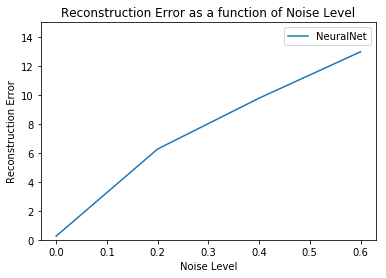

In [16]:
# Here the task is to "denoise" images. In particular,
# the input of the regression algorithm is a noisy 
# picture of a digit, and the regressor should reconstruct
# the original image of the digit. To do the training,
# we create a data set where the inputs are noisy 
# digits and the outputs are the original images.
# The learning method is then tested on new unseen
# noisy digits. This is done using 3-fold cross validation.


# Neural Net for Regression
NeuralNet = MyNeuralNetRegressor()

NeuralNet_scores_all = []
Noise_levels_all = []

# We want to test the method for different levels of noise
for noise_level in range(0, 8, 2):
    
    drop_probability = noise_level/10.0
    X_noisy = make_it_noisy (X, drop_probability)
    # The error is calculated in terms of mean_squared_error
    NeuralNet_scores = -1*cross_val_score(NeuralNet, X_noisy, X, cv=3, scoring='neg_mean_squared_error')
    NeuralNet_scores_all.append(NeuralNet_scores.mean())
    Noise_levels_all.append(drop_probability)
    
plt.plot(Noise_levels_all, NeuralNet_scores_all)

plt.legend(['NeuralNet'])
plt.title('Reconstruction Error as a function of Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Reconstruction Error')
plt.ylim(0,15)

plt.show()
    
